# DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) ist ein Clustering-Algorithmus, der Daten basierend auf der Dichte gruppiert. Er identifiziert Cluster von beliebiger Form und markiert Punkte, die nicht genügend Nachbarn haben, als Ausreißer (Rauschen).

In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [1]:
# Daten laden und vorbereiten
# Daten laden
silent = True
%run ../dataLoadAndPrepare.ipynb

print("Features des Datensatzes")
display(df.head())  

# Wichtige numerische Features für das Clustering
features = ['carat', 'price']  
df_cluster = df[features]

print("Für das Clustering werden folgende numerischen Features verwendet")
# Features für das Clustering
display(df_cluster.head())


Features des Datensatzes


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Für das Clustering werden folgende numerischen Features verwendet


,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


In [2]:
# DBSCAN-Clustering-Algorithmus 
# Skalierung der Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster) # Features skalieren, d.h. torz unterschiedlicher einheiten und skalen werden die daten auf eine einheitliche skala gebracht

# DBSCAN anwenden (Parameter kannst du anpassen)
dbscan = DBSCAN(eps=0.3, min_samples=10)  # eps bestimmt die Clustergröße, min_samples die Mindestanzahl an Punkten in einem Cluster

df_cluster['Cluster'] = dbscan.fit_predict(X_scaled) # Cluster zu den Daten hinzufügen

NameError: name 'StandardScaler' is not defined

Diamanten basierend auf ihren Karat- und Preis-Werten gruppiert


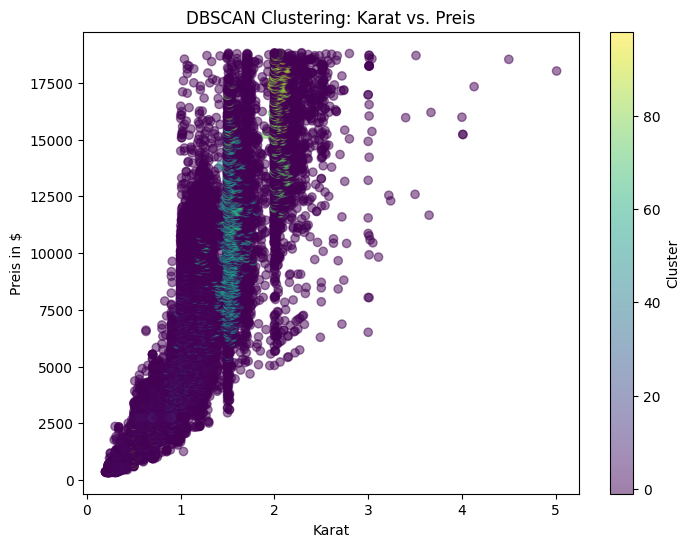

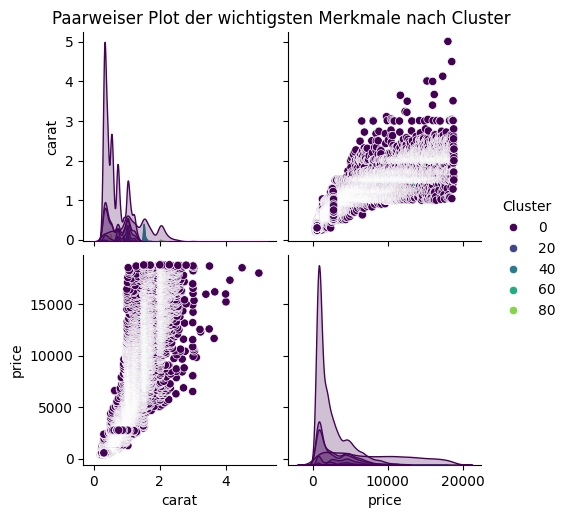

In [ ]:
# Visualisierung der Cluster

# Scatterplot der Cluster (nur Carat und Preis als Beispiel)

print("Diamanten basierend auf ihren Karat- und Preis-Werten gruppiert")
plt.figure(figsize=(8,6))
plt.scatter(df_cluster['carat'], df_cluster['price'], c=df_cluster['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel("Karat")
plt.ylabel("Preis in $")
plt.title("DBSCAN Clustering: Karat vs. Preis")
plt.colorbar(label="Cluster")
plt.show()

#display(df_cluster.head())


#Paarweise Plot (Pairplot) für eine bessere Übersicht der Cluster mit mehreren Variablen
sns.pairplot(df_cluster[['carat', 'price',"Cluster"]], hue='Cluster', palette='viridis')
plt.suptitle("Paarweiser Plot der wichtigsten Merkmale nach Cluster", y=1.02)
plt.show()
